In [30]:
# import required libs
import networkx as nx
import hypernetx as hnx
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from csv import reader

In [2]:
# load in the demo word data
with open('./demo_4plets.csv', 'r', encoding='utf-8') as f:
    csv_reader = reader(f)
    word_data = list(csv_reader)

In [3]:
word_data

[['fruit', 'banana', 'apple', 'mango'],
 ['vegetable', 'fruit', 'grow', 'farm'],
 ['fruit', 'banana', 'kiwi', 'orange'],
 ['fruit', 'kiwi', 'apple', 'pear'],
 ['vegetable', 'potato', 'carrot', 'pepper'],
 ['green', 'yellow', 'orange', 'red'],
 ['yellow', 'banana']]

# Pairwise Graph

In [4]:
def edge_convert(e):
    # return list of edge tuples such that the cue word is the centre of connection
    # e.g. edge_convert(['color', 'yellow', 'red', 'blue']) -> [('color', 'yellow'), ('color', 'red'), ('color', 'blue')]
    ret = [(e[0],i) for i in e[1:]]
    return ret

In [5]:
#compile a list of pairwise edges
edges = []
for r in word_data:
    edges += edge_convert(r)

In [6]:
edges

[('fruit', 'banana'),
 ('fruit', 'apple'),
 ('fruit', 'mango'),
 ('vegetable', 'fruit'),
 ('vegetable', 'grow'),
 ('vegetable', 'farm'),
 ('fruit', 'banana'),
 ('fruit', 'kiwi'),
 ('fruit', 'orange'),
 ('fruit', 'kiwi'),
 ('fruit', 'apple'),
 ('fruit', 'pear'),
 ('vegetable', 'potato'),
 ('vegetable', 'carrot'),
 ('vegetable', 'pepper'),
 ('green', 'yellow'),
 ('green', 'orange'),
 ('green', 'red'),
 ('yellow', 'banana')]

In [7]:
#build graph with the pairwise edge connections
PairGraph = nx.Graph(edges)

# Hypergraph

In [8]:
word_data_split = []
# pair each word with a number describing the hyperedge it belongs to
# each hyperedge is a single 4-word association row from the SWOW dataset
# each unique word can appear in multiple hyperedges
for idx, word_rows in enumerate(word_data):
    word_data_split += [[idx,w] for w in word_rows]

In [10]:
# add the word data to a pandas dataframe
word_data_frame = pd.DataFrame(word_data_split, columns=['edge_id','word'])

In [11]:
word_data_frame

,edge_id,word
0,0,fruit
1,0,banana
2,0,apple
3,0,mango
4,1,vegetable
5,1,fruit
6,1,grow
7,1,farm
8,2,fruit
9,2,banana


In [12]:
HyperGraph = hnx.Hypergraph(word_data_frame)

# Draw Graphs

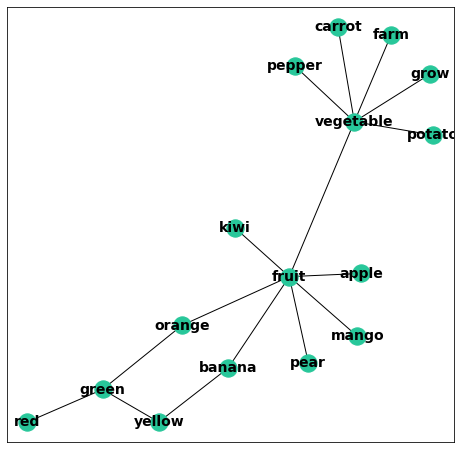

In [15]:
nx.draw_networkx(PairGraph,node_color='#28c79a',font_size=14,font_weight='bold')

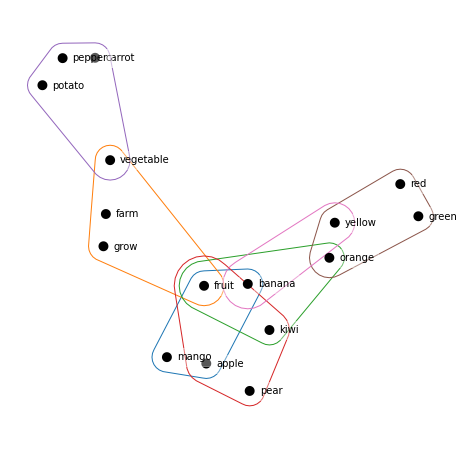

In [16]:
hnx.draw(HyperGraph,with_edge_labels=False)

# Centralities

In [26]:
fruit_deg = nx.degree(PairGraph,'fruit')
print(f"\nGraph degree of 'fruit': {fruit_deg}\n")

fruit_hdeg = hnx.Hypergraph.degree(HyperGraph,'fruit')
print(f"Hypergraph degree of 'fruit': {fruit_hdeg}\n")



Graph degree of 'fruit': 7

Hypergraph degree of 'fruit': 4



In [27]:
fruit_cc = nx.closeness.closeness_centrality(PairGraph,'fruit')
print(f"\nGraph closeness of 'fruit': {fruit_cc}\n")

fruit_hcc = hnx.s_closeness_centrality(HyperGraph,source='fruit',edges=False)
print(f"Hypergraph closeness of 'fruit': {fruit_hcc['fruit']:.4}\n")


Graph closeness of 'fruit': 0.625

Hypergraph closeness of 'fruit': 0.7143



In [28]:
red_deg = nx.degree(PairGraph,'red')
print(f"\nGraph degree of 'red': {red_deg}")

red_cc = nx.closeness.closeness_centrality(PairGraph,'red')
print(f"Graph closeness of 'red': {red_cc:.4}\n")

red_hdeg = hnx.Hypergraph.degree(HyperGraph,'fruit')
print(f"Hypergraph degree of 'red': {red_hdeg}")
red_hcc = hnx.s_closeness_centrality(HyperGraph,source='red',edges=False)
print(f"Hypergraph closeness of 'red': {red_hcc['red']:.4}\n")


Graph degree of 'red': 1
Graph closeness of 'red': 0.2679

Hypergraph degree of 'red': 4
Hypergraph closeness of 'red': 0.3846



# Full Graph Visualisation

In [31]:
word_data_9 = pickle.load(open('../pickle/word_data_aoa_9.p','rb'))

In [32]:
def edge_convert(e):
    # return list of edge tuples such that the cue word is the centre of connection
    # e.g. edge_convert(['color', 'yellow', 'red', 'blue']) -> [('color', 'yellow'), ('color', 'red'), ('color', 'blue')]
    ret = [(e[0],i) for i in e[1:]]
    return ret

In [33]:
#compile a list of pairwise edges
edges = []
for r in word_data_9[:50000]:
    edges += edge_convert(r)

In [34]:
#build graph with the pairwise edge connections
GT = nx.Graph(edges)

CPU times: total: 2min 14s
Wall time: 1min 26s


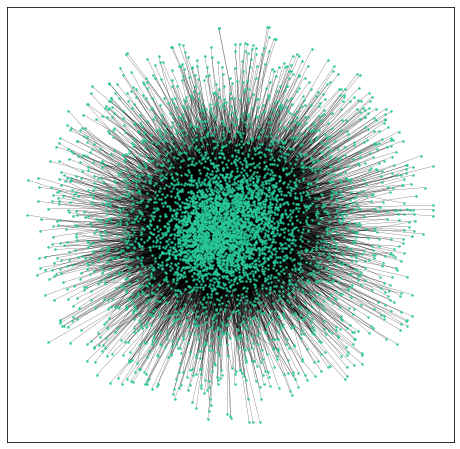

In [35]:
%%time
nx.draw_networkx(GT,node_size=5, node_color='#28c79a', with_labels=False,linewidths=0.2,width=0.2)
plt.savefig("plot.png", dpi=1000)